In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

nes_data_path = "Data/DataSet.csv"

nes_data = pd.read_csv(nes_data_path)


In [3]:
def LinRegressWPlot(x_values, y_values, x_label, y_label, position):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # format and save line equation for presentation on plot      
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # present plot
    plt.plot(x_values, y_values)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, position, fontsize = 15, color = "red")

    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: -0.5303272782317123


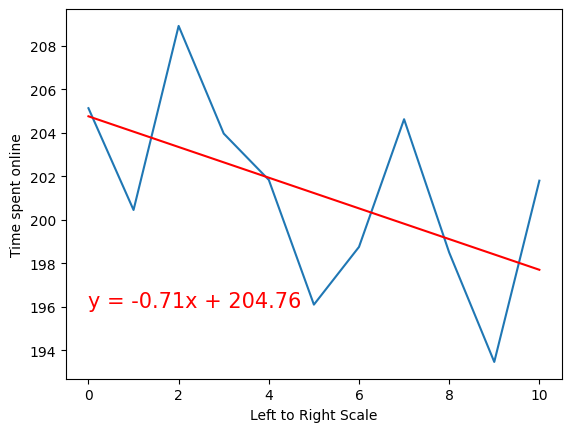

In [4]:
first_vis_data = nes_data.loc[:,
                                         ["essround", "idno", "cntry", "trstlgl", "netustm", "lrscale"]]

first_vis_cleaned = first_vis_data.dropna()

first_vis_cleaned = first_vis_cleaned.loc[(first_vis_cleaned["trstlgl"] <=10) & 
                                          (first_vis_cleaned["lrscale"] <=10) &
                                          (first_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "trstlgl", "netustm", "lrscale","cntry",]]

first_vis_averages =[]

first_vis_averages = first_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean" ,
                                           "netustm":"mean" 
                                           })

first_vis_averages = first_vis_averages.reset_index()

x_values = first_vis_averages["lrscale"]
y_values = first_vis_averages["netustm"]

LinRegressWPlot(x_values,y_values,"Left to Right Scale","Time spent online", (0,196))


The r-value is: 0.2577330016277506


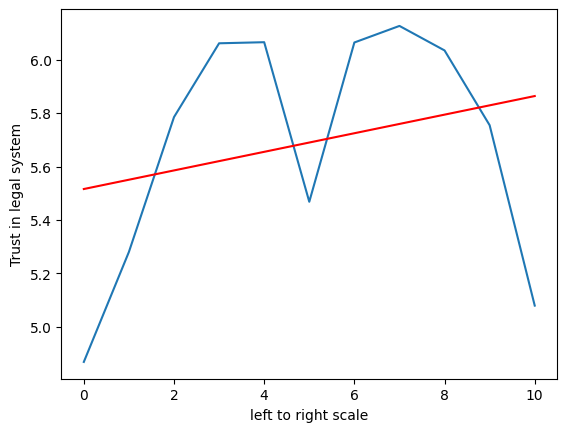

In [5]:
##############
first_vis_averages = first_vis_averages.sort_values("lrscale")

x_values = first_vis_averages["lrscale"]
y_values = first_vis_averages["trstlgl"]

# Incorporate the other graph properties
LinRegressWPlot(x_values, y_values,"left to right scale","Trust in legal system", (194, 5.0))

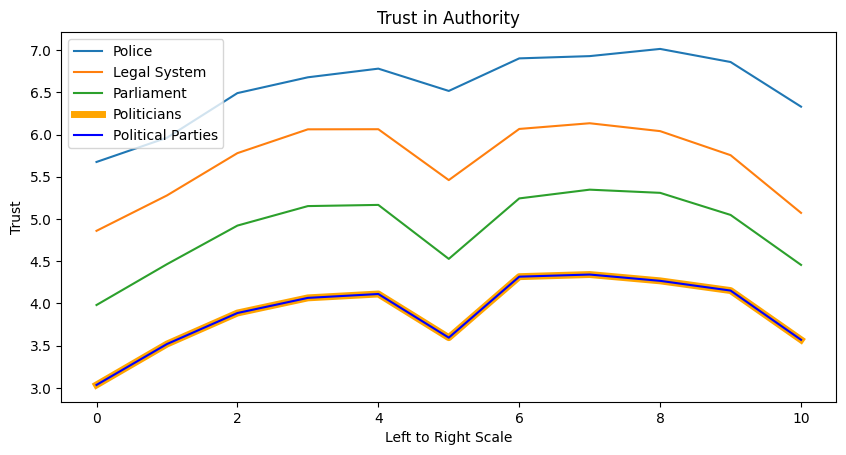

In [6]:
second_vis_data = nes_data.loc[:,["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "lrscale","netustm"]]


second_vis_cleaned = second_vis_data.dropna()

second_vis_cleaned = second_vis_cleaned.loc[(second_vis_cleaned["trstlgl"] <=10) & 
                                            (second_vis_cleaned["trstplt"] <=10) &
                                            (second_vis_cleaned["trstplc"] <=10) &
                                            (second_vis_cleaned["trstprl"] <=10) &
                                            (second_vis_cleaned["trstplt"] <=10) &
                                            (second_vis_cleaned["lrscale"] <=10) &
                                          (second_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "lrscale","netustm"]]


second_vis_averages =[]

second_vis_averages = second_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean" ,
                                            "trstplc": "mean" ,
                                            "trstplt": "mean" ,
                                            "trstprl": "mean" ,
                                            "trstprt": "mean" ,
                                            "netustm": "mean" 
                                           })
second_vis_averages = second_vis_averages.reset_index()

second_vis_averages


fig1, ax1 =plt.subplots()

ax1.set(xlabel = "Left to Right Scale", ylabel = "Trust", title = "Trust in Authority")
ax1.plot("lrscale", "trstplc",data = second_vis_averages,label="Police")
ax1.plot("lrscale", "trstlgl",data = second_vis_averages, label="Legal System")
ax1.plot("lrscale", "trstprl",data = second_vis_averages,label="Parliament")
ax1.plot("lrscale", "trstplt",data = second_vis_averages,label="Politicians", lw =5, color = "orange")
ax1.plot("lrscale", "trstplt",data = second_vis_averages,label="Political Parties", color = "blue")
fig1.set_figwidth(10)

ax1.legend()


In [7]:
corr_data = nes_data.loc[:,["trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "lrscale","netustm","essround"]]

corr_data_clean = corr_data.loc[(corr_data["trstlgl"] <=10) & 
                                    (corr_data["trstplt"] <=10) &
                                    (corr_data["trstplc"] <=10) &
                                    (corr_data["trstprl"] <=10) &
                                    (corr_data["trstplt"] <=10) &
                                    (corr_data["lrscale"] <=10) &
                                    (corr_data["essround"] == 9) &
                                    (corr_data["netustm"] < 6000), :]

corr_data_clean = corr_data_clean.dropna()

# Run the correlation:
final_corr = corr_data_clean.corr(method='pearson')
# Output to csv:
final_corr.to_csv("Data/nes_corr.csv")